In [47]:
import sys
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px


In [48]:
!{sys.executable} -m pip install fredapi > NUL 2>&1

In [49]:
from dotenv import load_dotenv
load_dotenv(dotenv_path='../.env')
api_key = os.getenv("FRED_API_KEY")

In [50]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [51]:
from fredapi import Fred
fred = Fred(api_key=api_key)

In [54]:
sp_search = fred.search('S&P', order_by='popularity')

ParseError: syntax error: line 1, column 49 (<string>)

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-07-04,2025-07-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-07-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 09:00:03-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-07-04,2025-07-04,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-06-24 08:12:56-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-07-04,2025-07-04,S&P 500,2015-07-06,2025-07-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-03 19:04:07-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-07-04,2025-07-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-07-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 09:00:03-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-07-04,2025-07-04,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-07-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 09:10:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


<Axes: title={'center': 'S&P 500'}>

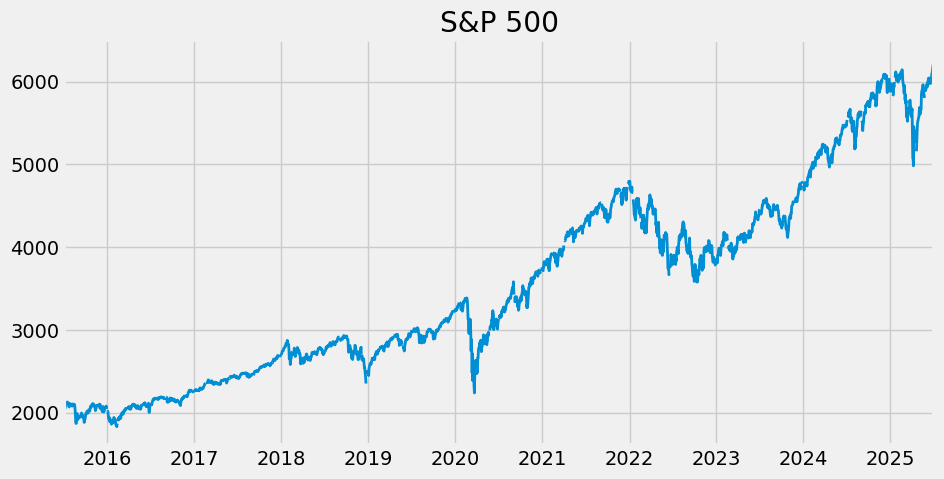

In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw=2)

In [ ]:
sp500

2015-07-06    2068.76
2015-07-07    2081.34
2015-07-08    2046.68
2015-07-09    2051.31
2015-07-10    2076.62
               ...   
2025-06-27    6173.07
2025-06-30    6204.95
2025-07-01    6198.01
2025-07-02    6227.42
2025-07-03    6279.35
Length: 2609, dtype: float64

In [ ]:
unemp_results = fred.search('unemployment')
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-04,2025-07-04,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:54-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-07-04,2025-07-04,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 07:47:54-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-07-04,2025-07-04,Unemployment Level,1948-01-01,2025-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-07-03 07:48:40-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-07-04,2025-07-04,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-07-04,2025-07-04,Continued Claims (Insured Unemployment),1967-01-07,2025-06-21,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-07-03 07:33:02-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC317430010,ENUC317430010,2025-07-04,2025-07-04,"Total Quarterly Wages in Manhattan, KS (MSA)",2013-01-01,2024-10-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2025-06-04 11:20:23-05:00,1,Total wages are the wages paid by Unemployment...
IPUEN3116L020000000,IPUEN3116L020000000,2025-07-04,2025-07-04,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2025-04-24 15:24:03-05:00,1,"Labor compensation, defined as payroll plus su..."
IPUEN3116U110000000,IPUEN3116U110000000,2025-07-04,2025-07-04,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2025-04-24 15:24:02-05:00,1,"Labor compensation, defined as payroll plus su..."


<Axes: >

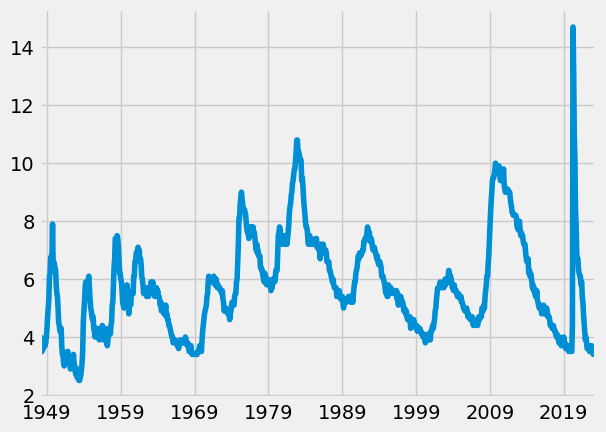

In [ ]:
unrate = fred.get_series(
    series_id='UNRATE',
    observation_start='2015-07-06',
    observation_end='2023-07-07')
unrate.plot()

In [53]:
unrate


1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2025-02-01    4.1
2025-03-01    4.2
2025-04-01    4.2
2025-05-01    4.2
2025-06-01    4.1
Length: 930, dtype: float64